# **Introduction to Cohort and RFM analysis**

Di ranah pemasaran dan analisis berbasis data, bisnis selalu mencari cara untuk memahami dan memanfaatkan perilaku pelanggan untuk mendorong pertumbuhan dan profitabilitas. Dua alat yang kuat dalam upaya ini adalah cohort analysis dan recency, frequency, monetary (RFM) analysis.

Cohort analyis melibatkan segmentasi pelanggan berdasarkan karakteristik atau pengalaman bersama dalam periode waktu yang ditentukan. Di sisi lain, analisis RFM berfokus pada segmentasi pelanggan berdasarkan aktivitas pembelian terbaru, frekuensi transaksi, dan nilai moneter.

Menggabungkan cohort analyis dengan analisis RFM memberikan pemahaman menyeluruh tentang perilaku dan segmentasi pelanggan bagi bisnis. Dengan memanfaatkan wawasan dari kedua pendekatan tersebut, bisnis dapat membuat keputusan yang terinformasi untuk meningkatkan akuisisi pelanggan, retensi, dan profitabilitas secara keseluruhan. Baik itu memahami perilaku kelompok pelanggan tertentu dari waktu ke waktu atau melakukan segmentasi pelanggan berdasarkan recency, frequency, dan nilai moneter, teknik analisis ini memainkan peran penting dalam mendorong kesuksesan pemasaran di era persaingan yang ketat saat ini.
___

In [1]:
# data manipulation
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

## **1. What is Cohort Analysis?**

Sebuah cohort adalah kelompok pengguna yang memiliki sesuatu yang sama, baik itu tanggal pendaftaran, bulan pembelian pertama, tanggal lahir, saluran akuisisi, dll. Analisis cohort adalah metode di mana kelompok-kelompok ini dilacak dari waktu ke waktu, membantu kita melihat tren, memahami perilaku berulang (pembelian, keterlibatan, jumlah yang dihabiskan, dll.), dan memantau retensi pelanggan dan pendapatan kita.

Umumnya, cohort dibuat berdasarkan penggunaan pertama pelanggan terhadap platform, di mana "penggunaan" bergantung pada metrik kunci bisnis kita. Untuk Uber atau Lyft, penggunaan akan menjadi pemesanan perjalanan melalui salah satu aplikasi mereka. Untuk GrubHub, itu adalah pemesanan makanan. Untuk AirBnB, itu adalah pemesanan penginapan.

Dengan perusahaan-perusahaan ini, pembelian adalah inti dari layanan mereka, baik itu melakukan perjalanan atau pemesanan makan malam - pendapatan mereka terkait dengan perilaku pembelian pengguna mereka.

Ketika membangun analisis cohort, penting untuk mempertimbangkan hubungan antara peristiwa atau interaksi yang kita lacak dan hubungannya dengan model bisnis kita.

## **2. Why is it valuable?**


Analisis cohort dapat membantu dalam memahami kesehatan bisnis kita dan "stickiness" - kesetiaan pelanggan kita. Kesetiaan pelanggan sangat penting karena jauh lebih murah dan lebih mudah untuk mempertahankan pelanggan yang sudah ada daripada mengakuisisi yang baru. Bagi startup, ini juga merupakan indikator kunci kesesuaian produk dengan pasar.

Selain itu, produk kita berkembang seiring waktu. Fitur-fitur baru ditambahkan dan dihapus, desain berubah, dll. Mengamati kelompok-kelompok individu dari waktu ke waktu adalah titik awal untuk memahami bagaimana perubahan-perubahan ini memengaruhi perilaku pengguna.

Ini juga merupakan cara yang baik untuk memvisualisasikan retensi/churn pengguna kita serta merumuskan pemahaman dasar tentang nilai seumur hidup mereka.

## **3. Cohort Analysis with Python**

Selanjutnya kita akan coba mempraktikan cara membuat analisis cohort di Python.

In [6]:
df = pd.read_csv(
    'cohort_analysis.csv', 
    parse_dates=['InvoiceDate'],        # mengubah kolom InvoiceDate menjadi datetime
    dtype={'CustomerID': str}           # mengubah kolom CustomerID sebagai string
)
df.sample(5, random_state=42)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
47403,545819,21175,GIN + TONIC DIET METAL SIGN,2,2011-07-03 12:31:00,2.55,16356,United Kingdom
336821,577479,23265,SET OF 3 WOODEN TREE DECORATIONS,12,2011-11-20 11:34:00,1.25,14911,EIRE
307418,574720,72232,FENG SHUI PILLAR CANDLE,12,2011-06-11 14:39:00,0.19,14547,United Kingdom
376215,581169,22804,PINK HANGING HEART T-LIGHT HOLDER,6,2011-07-12 14:54:00,2.95,16779,United Kingdom
160692,559934,21903,MAN FLU METAL SIGN,12,2011-07-14 09:58:00,2.10,13012,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379979 entries, 0 to 379978
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    379979 non-null  object        
 1   StockCode    379979 non-null  object        
 2   Description  379979 non-null  object        
 3   Quantity     379979 non-null  int64         
 4   InvoiceDate  379979 non-null  datetime64[ns]
 5   UnitPrice    379979 non-null  float64       
 6   CustomerID   379979 non-null  object        
 7   Country      379979 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 23.2+ MB


Perhatikan bahwa kita menggunakan `parse_dates` untuk mengubah **InvoiceDate** dari object menjadi datetime. Kemudian kita juga menggunakan `dtype` untuk mengubah **CustomerID** dari integer menjadi object.

Selanjutnya kita akan membuat cohort dalam beberap langkah.

### `1. Create a period column based on the OrderDate`

Karena kita akan melakukan monthly cohort, kita akan melihat total perilaku bulanan dari pengguna. Oleh karena itu, kita tidak menginginkan data InvoiceDate yang terperinci (saat ini).

In [14]:
df['InvoicePeriod'] = df['InvoiceDate'].dt.to_period('M')
df.sample(5, random_state=42)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoicePeriod
47403,545819,21175,GIN + TONIC DIET METAL SIGN,2,2011-07-03 12:31:00,2.55,16356,United Kingdom,2011-07
336821,577479,23265,SET OF 3 WOODEN TREE DECORATIONS,12,2011-11-20 11:34:00,1.25,14911,EIRE,2011-11
307418,574720,72232,FENG SHUI PILLAR CANDLE,12,2011-06-11 14:39:00,0.19,14547,United Kingdom,2011-06
376215,581169,22804,PINK HANGING HEART T-LIGHT HOLDER,6,2011-07-12 14:54:00,2.95,16779,United Kingdom,2011-07
160692,559934,21903,MAN FLU METAL SIGN,12,2011-07-14 09:58:00,2.10,13012,United Kingdom,2011-07


Perhatikan bahwa `dt.to_period('M')` dipakai untuk mengubah format datetime menjadi yyyy-mm.

### `2. Determine the user's cohort group (based on their first order)`

Buat kolom baru bernama CohortGroup, yang dalam kasus ini merupakan tahun dan bulan terjadinya transaksi pertama pengguna. Dalam kasus lain cohort group bisa berupa tanggal/waktu aktivitas pertama dari seorang user seperti tanggal pembelian pertama, tanggal login pertama, bulan transaksi pertama, tanggal berlangganan pertama, dan lainnya.

In [22]:
# menampilkan bulan pembelian pertama dari setiap CustomerID
df.groupby('CustomerID')['InvoicePeriod'].min()

CustomerID
12346    2011-01
12347    2011-01
12348    2011-01
12349    2011-11
12350    2011-02
          ...   
18280    2011-07
18281    2011-12
18282    2011-02
18283    2011-01
18287    2011-05
Name: InvoicePeriod, Length: 4244, dtype: period[M]

In [25]:
df['CohortGroup'] = df.groupby('CustomerID')['InvoicePeriod'].transform('min')
df.sample(5, random_state=42)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoicePeriod,CohortGroup
47403,545819,21175,GIN + TONIC DIET METAL SIGN,2,2011-07-03 12:31:00,2.55,16356,United Kingdom,2011-07,2011-04
336821,577479,23265,SET OF 3 WOODEN TREE DECORATIONS,12,2011-11-20 11:34:00,1.25,14911,EIRE,2011-11,2011-01
307418,574720,72232,FENG SHUI PILLAR CANDLE,12,2011-06-11 14:39:00,0.19,14547,United Kingdom,2011-06,2011-05
376215,581169,22804,PINK HANGING HEART T-LIGHT HOLDER,6,2011-07-12 14:54:00,2.95,16779,United Kingdom,2011-07,2011-01
160692,559934,21903,MAN FLU METAL SIGN,12,2011-07-14 09:58:00,2.10,13012,United Kingdom,2011-07,2011-02


Perhatikan bahwa kita menggunakan `transform` yang berperan seperti window function pada SQL.
Dengan `transform` jumlah baris tetap dipertahankan dan nilai yang ditampilkan sesuai aggregate function yang kita masukkan dalam fungsi tersebut.

###  `3. Rollup data by CohortGroup & InvoicePeriod`

Selanjutnya kita akan melakukan agregasi berdasarkan CohortGroup dan InvoicePeriod-nya. Adapun fungsi agregat dan kolom yang dipakai disesuaikan dengan kebutuhan. 

Misal dalam kasus ini kita ingin melihat berapa banyak user berbeda yang melakukan pembelian berdasarkan Cohort Date dan Current Activity Date, maka kita akan menggunakan `nunique` terhadap kolom **CustomerID**.

In [27]:
df.groupby(['CohortGroup', 'InvoicePeriod'], as_index=False)[['CustomerID']].nunique()

,CohortGroup,InvoicePeriod,CustomerID
0,2011-01,2011-01,967
1,2011-01,2011-02,320
2,2011-01,2011-03,368
3,2011-01,2011-04,338
4,2011-01,2011-05,381
...,...,...,...
73,2011-10,2011-11,53
74,2011-10,2011-12,10
75,2011-11,2011-11,244
76,2011-11,2011-12,11


In [30]:
cohort = df.groupby(['CohortGroup', 'InvoicePeriod'], as_index=False).agg(
    n_customers=('CustomerID', 'nunique')
)

cohort
# nama_kolom_yang_dikehendaki = (nama_kolom_yang_akan_diagregasi, fungsi agregat)

,CohortGroup,InvoicePeriod,n_customers
0,2011-01,2011-01,967
1,2011-01,2011-02,320
2,2011-01,2011-03,368
3,2011-01,2011-04,338
4,2011-01,2011-05,381
...,...,...,...
73,2011-10,2011-11,53
74,2011-10,2011-12,10
75,2011-11,2011-11,244
76,2011-11,2011-12,11


### `4. Label the PeriodDistance for each CohortGroup`

Kita ingin melihat perilaku setiap cohort dalam beberapa bulan setelah transaksi pertama mereka, jadi kita perlu mengindeks setiap cohort ke bulan transaksi pertama mereka. Misalnya, PeriodDistance = 0 menunjukkan waktu cohort tersebut melakukan transaksi pertama, PeriodDistance = 1 adalah 1 bulan setelah mereka melakukan transaksi pertama, dan seterusnya.

Hal ini memungkinkan kita membandingkan cohort di berbagai tahap kehidupan mereka.

In [37]:
from operator import attrgetter

cohort['PeriodDistance'] = (cohort['InvoicePeriod'] - cohort['CohortGroup']).apply(attrgetter('n'))
cohort

,CohortGroup,InvoicePeriod,n_customers,PeriodDistance
0,2011-01,2011-01,967,0
1,2011-01,2011-02,320,1
2,2011-01,2011-03,368,2
3,2011-01,2011-04,338,3
4,2011-01,2011-05,381,4
...,...,...,...,...
73,2011-10,2011-11,53,1
74,2011-10,2011-12,10,2
75,2011-11,2011-11,244,0
76,2011-11,2011-12,11,1


### `5. Calculate percentage change of each CohortGroup over time`

Kita ingin melihat persentase perubahan setiap CohortGroup dari waktu ke waktu -- bukan perubahan absolutnya.

Untuk melakukan hal ini, pertama-tama kita perlu membuat kolom baru yang berisi ukuran dari setiap CohortGroup.

In [41]:
cohort['CohortSize'] = cohort.groupby('CohortGroup')['n_customers'].transform('max')
cohort.head()

,CohortGroup,InvoicePeriod,n_customers,PeriodDistance,CohortSize
0,2011-01,2011-01,967,0,967
1,2011-01,2011-02,320,1,967
2,2011-01,2011-03,368,2,967
3,2011-01,2011-04,338,3,967
4,2011-01,2011-05,381,4,967


Selanjutnya kita menghitung persentasenya.

In [45]:
cohort['Percentage'] = round(cohort['n_customers']/cohort['CohortSize']*100, 2)
cohort

,CohortGroup,InvoicePeriod,n_customers,PeriodDistance,CohortSize,Percentage
0,2011-01,2011-01,967,0,967,100.00
1,2011-01,2011-02,320,1,967,33.09
2,2011-01,2011-03,368,2,967,38.06
3,2011-01,2011-04,338,3,967,34.95
4,2011-01,2011-05,381,4,967,39.40
...,...,...,...,...,...,...
73,2011-10,2011-11,53,1,266,19.92
74,2011-10,2011-12,10,2,266,3.76
75,2011-11,2011-11,244,0,244,100.00
76,2011-11,2011-12,11,1,244,4.51


### `6. Create pivot table by Cohort Group`

Selanjutnya kita akan membuat pivot table yang menampilkan tingkat retensi user dari waktu ke waktu.

In [48]:
cohort_pivot = cohort.pivot_table(
    index='CohortGroup',
    columns='PeriodDistance',
    values='Percentage'
)

cohort_pivot

PeriodDistance,0,1,2,3,4,5,6,7,8,9,10,11
CohortGroup,,,,,,,,,,,,
2011-01,100.0,33.09,38.06,34.95,39.40,41.05,40.95,35.26,43.12,42.71,49.74,19.75
2011-02,100.0,25.28,26.20,30.63,30.63,31.92,29.89,31.18,31.73,37.27,10.89,NaN
2011-03,100.0,21.80,24.20,24.60,25.80,22.60,24.00,27.40,28.80,7.00,NaN,NaN
2011-04,100.0,22.45,21.93,21.41,19.58,19.84,27.68,25.59,6.27,NaN,NaN,NaN
2011-05,100.0,19.74,20.71,17.48,24.92,18.77,28.48,7.44,NaN,NaN,NaN,NaN
2011-06,100.0,18.15,17.52,20.38,19.43,27.71,6.69,NaN,NaN,NaN,NaN,NaN
2011-07,100.0,19.84,18.65,21.03,26.19,3.97,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,100.0,17.20,23.66,27.96,5.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09,100.0,15.69,21.57,2.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### `7. Visualize`

Untuk tahap akhir kita akan membuat visualisasi dalam bentuk heatmap dan lineplot.

**Heatmap**

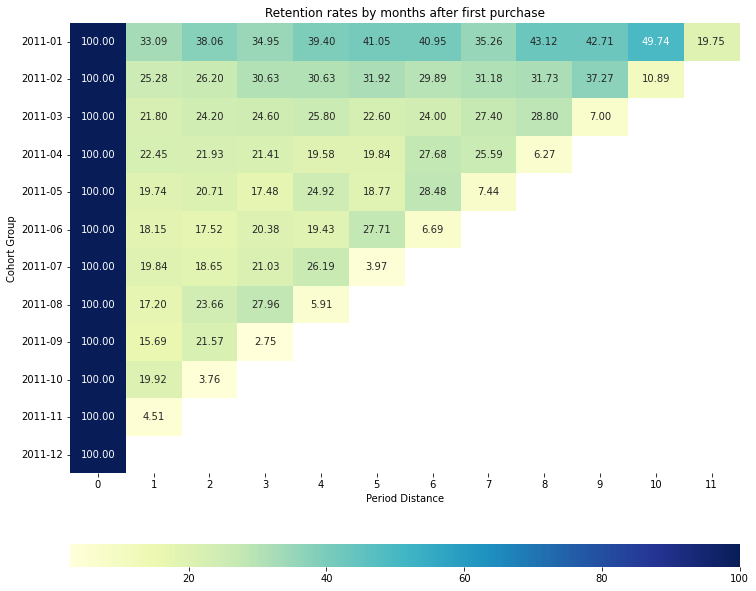

In [66]:
grid = {
    'height_ratios': (20,1),                    # mengatur perbandingan tinggi antara subplot 1 dan subplot 2
    'hspace':0.3                                # mengatur jarak antara subplot 1 dan subplot 2
}


fig, (ax_top, ax_bot) = plt.subplots(nrows=2, ncols=1, figsize=(12,10), gridspec_kw=grid)

sns.heatmap(
    cohort_pivot,
    annot=True,                                 # menambahkan anotasi/label data
    fmt='.2f',                                  # format dari anotasi
    cmap='YlGnBu',
    ax=ax_top,                                  # menempatkan heatmap pada subplot 1
    cbar_ax=ax_bot,                             # menempatkan colorbar pada subplot 2
    cbar_kws={'orientation':'horizontal'}       # mengubah orientasi dari colorbar
)

ax_top.set(
    title='Retention rates by months after first purchase',
    xlabel='Period Distance',
    ylabel='Cohort Group'
)

plt.show()

**Insight**

- Secara horizontal (kiri ke kanan), untuk setiap cohort, persentase customer dari bulan ke bulan cukup fluktuatif.
- Secara vertikal (atas ke bawah), jika melihat pada Month Distance ke-1, persentase customer pada cohort yang lebih baru cenderung lebih sedikit (kurang loyal) dibandingkan pada cohort yang lebih lama.
- Cohort bulan Januari 2011 (2011-01) adalah cohort yang paling loyal (retain).
- Persentase customer terbanyak terjadi pada Cohort Januari (2011-01) di bulan ke-10 sebesar 49.74%
- Persentase customer terendah terjadi pada Cohort September (2011-09) di bulan ke-3 sebesar 2.75%.
- Pada bulan November 2011, untuk semua cohort mengalami peningkatan jumlah customer (asumsi : black friday)

**Line plot**

In [75]:
cohort_pivot.index

PeriodIndex(['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
             '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12'],
            dtype='period[M]', name='CohortGroup')

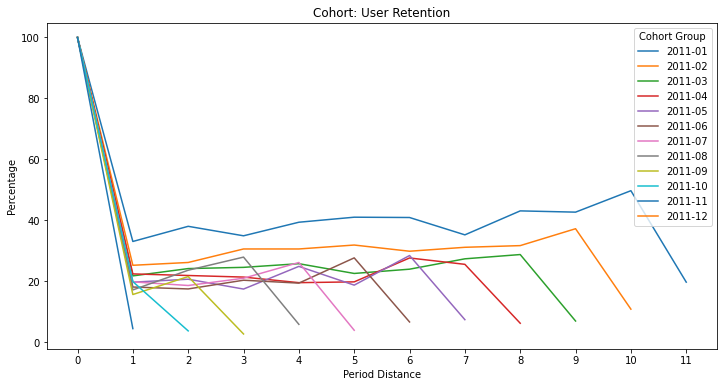

In [80]:
fig, ax = plt.subplots(figsize=(12, 6))

for cohort in cohort_pivot.index:
    ax.plot(
        cohort_pivot.columns,               # sumbu x
        cohort_pivot.loc[cohort],           # sumbu y
        label=cohort
    )

ax.set(
    title='Cohort: User Retention',         # judul
    xlabel='Period Distance',               # label pada sumbu x
    ylabel='Percentage',                    # label pada sumbu y
    xticks=np.arange(len(cohort_pivot))     # mengatur tick dari sumbu x
)

ax.legend(loc='upper right', title='Cohort Group')
plt.show()

## **4. What is RFM Analysis?**

RFM Analysis merupakan salah satu metode analisis yang digunakan untuk segmentasi customer berdasarkan informasi kebiasaan dari customer itu sendiri. Adapun metrik yang akan dianalisa adalah sebagai berikut:

- `Recency` : berapa lama sejak customer melakukan pembelian.
- `Frequency` : seberapa sering customer melakukan transaksi.
- `Monetary` : jumlah pengeluaran customer dalam transaksi.

![](https://clevertap.com/wp-content/uploads/2018/03/Incontent_image.png)

Metrik-metrik dalam RFM biasanya akan digunakan untuk mengetahui karakteristik dari suatu customer. Selain itu bisa digunakan juga untuk mengetahui value dari suatu customer. Apakaoh customer A termasuk customer yang loyal? Apakah customer A termasuk customer yang selalu melakukan transaksi yang cukup besar? dan lain sebagainya. Menggunakan metrik tersebut, akan dibuat suatu segmen customer berdasarkan nilainya misal high-value, medium-value, dan low-value.

## **5. Calculate RFM values**

Sekarang mari kita hitung nilai recency, frequency dan monetary. Dalam kasus ini, kita juga mengasumsikan bahwa kita ingin mengelompokkan customer kita ke dalam 4 segmen dengan ketentuan berikut:

![](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEibG08VAjnoHCP8LgpmrutFZy9Mftfo9vCmK7H7Zi3ePGJavAp0yITSw5Kyjuw0lHuuz6nCpSfoc4LQb5MbljMtNpIb2wh-0DjCm3sJ22l6tmBw7BsYuRWjGmzlo3-Yp0xKoLIs-wsrjDhYXTMBh6ub2iACVMMPzzdrC65p599RHGB-VXpsCH6sCX9L0Q/s1600/RFM-model.jpg)

Pada contoh di atas digunakan quartile, kita dapat membagi menjadi 3 bagian atau 5 bagian, keputusan ditangan kita.

- Frequency, makin banyak makin besar nilainya.
- Recency, semakin dekat waktu belanja, semakin besar nilainya, karena semakin minim recency berarti paling dekat waktu pembelanjaannya.
- Monetary, makin besar nilai belanjanya makin besar nilai dari monetary.
- Final values, akan berkisar dari nilai dari 3 (nilai minimum adalah 1, terdapat tiga elemen) dan nilai maksimum 12 (nilai maksimum adalah 4 untuk masing-masing elemen).

Kita dapat memberikan nama dari setiap segmen, pada contoh diatas menggunakan nama metal Platinum, Gold, Silver dan Bronze. Kita dapat menggunakan penamaan yang relevan dengan bisnis kita.

Final values diatas hanya contoh, kita dapat mengubahnya sesuai tujuan dari analisa.

### `Recency`

Seperti yang sudah dijelaskan pada bagian sebelumnya, recency akan melihat berapa lama waktu customer dalam melakukan transaksi terakhirnya. Oleh karena itu untuk mendapatkan nilai recency, perlu diketahui terlebih dahulu tanggal terakhir customer melakukan transaksi. Selanjutnya akan diselisihkan hari terakhir customer melakukan transaksi dengan hari melakukan analisis. Sebagai asumsi, hari analisis diperoleh dari hari terakhir transaksi + 1.

In [84]:
import datetime

analysis_date = df['InvoiceDate'].max() + datetime.timedelta(1)
analysis_date

Timestamp('2011-12-11 17:19:00')

Langkah selanjutnya menghitung recency dari tiap customer.

In [88]:
df_recency = df.groupby('CustomerID').agg(
    recency=('InvoiceDate', lambda x: (analysis_date - x.max()).days),
    customer_age=('InvoiceDate', lambda x: (analysis_date - x.min()).days),
)

df_recency.sample(5, random_state=42)

,recency,customer_age
CustomerID,,
15110,25,320
17655,12,286
18200,107,107
12573,229,229
15797,97,321


Apabila dilihat dari hasil tabel diatas, diketahui bahwa customer dengan CustomerID 12573 sudah selama 229 hari yang lalu. Artinya customer 12573 sudah cukup lama tidak berbelanja pada toko tersebut. Sedangkan customer 17655 baru 12 hari yang lalu melakukan transaksi terakhir, artinya customer ini cukup baru dalam berbelanja di toko tersebut.

### `Frequency`
Untuk mengetahui seberapa sering customer melakukan transaksi, dapat dianalisa dari nilai frekuensi pembelanjaan dari masing-masing customer.

In [90]:
df_frequency = df.groupby('CustomerID').agg(
    frequency=('InvoiceNo', lambda x: x.nunique()),
)

df_frequency.sample(5, random_state=42)

,frequency
CustomerID,
15110,7
17655,6
18200,1
12573,1
15797,4


Melihat customer 12573 yang sudah cukup lama berbelanja, jika dilihat dari seberapa sering berbelanja di toko tersebut juga hanya 1 kali, sangat tidak sering. Berbeda dengan customer 17655 cukup sering berbelanja terlihat sudah sebanyak 6 kali berbelanja di toko tersebut.

### `Monetary`
Selanjutnya yaitu monetary, seberapa banyak pengeluaran customer dalam setiap transaksi. Nilai monetary dapat diperoleh dari perkalian harga barang yang dibeli dengan jumlah barang yang dibeli dalam satu kali transaksi. Kita akan membuat dulu kolom TotalPrice yang menunjukkan hasil perkalian antara UnitPrice dan Quantity. 

In [93]:
df['TotalPrice'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoicePeriod,CohortGroup,TotalPrice
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-04-01 10:00:00,1.95,13313,United Kingdom,2011-04,2011-04,19.5
1,539993,21499,BLUE POLKADOT WRAP,25,2011-04-01 10:00:00,0.42,13313,United Kingdom,2011-04,2011-04,10.5
2,539993,21498,RED RETROSPOT WRAP,25,2011-04-01 10:00:00,0.42,13313,United Kingdom,2011-04,2011-04,10.5
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-04-01 10:00:00,2.10,13313,United Kingdom,2011-04,2011-04,10.5
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-04-01 10:00:00,1.25,13313,United Kingdom,2011-04,2011-04,12.5


Langkah selanjutnya adalah menjumlahkan TotalPrice dari masing-masing customer.

In [95]:
df_monetary = df.groupby('CustomerID').agg(
    monetary=('TotalPrice', 'sum'),
    avg_spend_per_product=('TotalPrice', 'mean'),
)

df_monetary.sample(5, random_state=42)

,monetary,avg_spend_per_product
CustomerID,,
15110,970.25,24.256250
17655,1962.84,23.937073
18200,163.80,5.118750
12573,160.54,5.733571
15797,2207.40,275.925000


Kembali lagi pada customer 12573 jika dilihat pernah melakukan satu kali transaksi dan sudah lama sekali tidak melakukan transaksi kembali, dalam satu kali transaksi tersebut pun transaksinya cukup kecil dengan besaran pengeluarannya yaitu $160.54. Sedangkan jika melihat customer 17655 besaran pengeluaran yang dilakukan dalam 6 transaksi tersebut yaitu $1962.84 dengan rata-rata pengeluaran per product yaitu $23.9

Selanjutnya setiap informasi yang sudah diperoleh baik, recency, frequency dan monetary akan digabungkan dalam 1 dataframe agar mudah dilakukan analisis untuk segmentasi customer.

In [96]:
df_customer = df.groupby('CustomerID').agg(
    recency=('InvoiceDate', lambda x: (analysis_date - x.max()).days),
    customer_age=('InvoiceDate', lambda x: (analysis_date - x.min()).days),
    frequency=('InvoiceNo', lambda x: x.nunique()),
    monetary=('TotalPrice', 'sum'),
    avg_spend_per_product=('TotalPrice', 'mean'),
)

df_customer.sample(5, random_state=42)

,recency,customer_age,frequency,monetary,avg_spend_per_product
CustomerID,,,,,
15110,25,320,7,970.25,24.256250
17655,12,286,6,1962.84,23.937073
18200,107,107,1,163.80,5.118750
12573,229,229,1,160.54,5.733571
15797,97,321,4,2207.40,275.925000


Berikut penjelasan dari masing-masing variabel diatas:

| Variable | Description |
| --- | --- |
| customerID | ID customer|
| customer_age | Usia customer, diperoleh dari selisih hari pertama bertransaksi dengan hari analisis |
| recency | Selisih hari terakhir bertransaksi dengan hari analisis |
| frequency | Jumlah transaksi yang dilakukan oleh customer |
| monetary | Besar pengeluaran yang dilakukan oleh customer |
| avg_spend_per_product | Rata-rata besar pengeluaran yang dilakukan customer per product|

### `RFM Segmentation`

**Recency Segmentation**

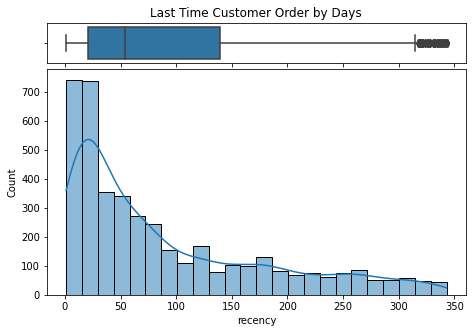

0.00      1.0
0.25     21.0
0.50     54.0
0.75    139.0
1.00    343.0
Name: recency, dtype: float64

In [106]:
grid = {
    'height_ratios': (0.15, 0.85),
    'hspace': 0.05
}

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(7.5, 5), gridspec_kw=grid)

sns.boxplot(data=df_customer, x='recency', ax=ax1)
sns.histplot(data=df_customer, x='recency', kde=True, ax=ax2)

ax1.set(
    title='Last Time Customer Order by Days'
)

plt.show()

display(df_customer['recency'].quantile([0, 0.25, 0.5, 0.75, 1]))

Berdasarkan distribusi di atas, kita akan kelompokkan customer berdasarkan recency-nya ke dalam 4 kelompok yaitu :
- 4 (Active) : melakukan transaksi kurang dari 21 hari terakhir
- 3 (Warm) : melakukan transaksi antara 21 hingga 54 hari terakhir
- 2 (Cold) : melakukan transaksi antara 54 hingga 139 hari terakhir
- 1 (Inactive) : melakukan transaksi lebih dari 139 hari terakhir

In [124]:
df_customer['r_score'] = pd.qcut(df_customer['recency'], q=4, labels=[4, 3, 2, 1]).astype(int)      # q=4, kita bagi menjadi 4 kelompok dengan jumlah yang sama
df_customer.sample(5, random_state=42)

,recency,customer_age,frequency,monetary,avg_spend_per_product,r_score,f_score,m_score
CustomerID,,,,,,,,
15110,25,320,7,970.25,24.256250,3,4,3
17655,12,286,6,1962.84,23.937073,4,4,4
18200,107,107,1,163.80,5.118750,2,1,1
12573,229,229,1,160.54,5.733571,1,1,1
15797,97,321,4,2207.40,275.925000,2,3,4


**Frequency Segmentation**

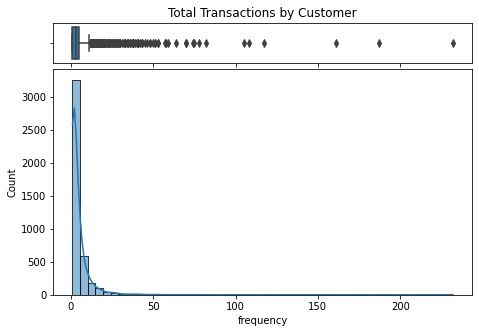

0.00      1.0
0.25      1.0
0.50      3.0
0.75      5.0
1.00    232.0
Name: frequency, dtype: float64

In [111]:
grid = {
    'height_ratios': (0.15, 0.85),
    'hspace': 0.05
}

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(7.5, 5), gridspec_kw=grid)

sns.boxplot(data=df_customer, x='frequency', ax=ax1)
sns.histplot(data=df_customer, x='frequency', kde=True, ax=ax2, bins=50)

ax1.set(
    title='Total Transactions by Customer'
)

plt.show()

display(df_customer['frequency'].quantile([0, 0.25, 0.5, 0.75, 1]))

Berdasarkan distribusi di atas, kita akan kelompokkan customer berdasarkan frequency-nya ke dalam 4 kelompok mengacu pada jumlah transaksi yang kita tentukan yaitu:
- 4 (Loyal) : melakukan transaki lebih dari 5 kali
- 3 (High) : melakukan transaksi 4 hingga 5 kali
- 2 (Medium) : melakukan transaksi 2 hingga 3 kali
- 1 (Low) : melakukan transaksi hanya 1 kali.

In [114]:
def f_score(x):
    if x==1:
        return 1
    elif x <= 3:
        return 2
    elif x <= 5:
        return 3
    else:
        return 4
    
df_customer['f_score'] = df_customer['frequency'].apply(f_score)
df_customer.sample(5, random_state=42)

,recency,customer_age,frequency,monetary,avg_spend_per_product,r_score,f_score
CustomerID,,,,,,,
15110,25,320,7,970.25,24.256250,3,4
17655,12,286,6,1962.84,23.937073,4,4
18200,107,107,1,163.80,5.118750,2,1
12573,229,229,1,160.54,5.733571,1,1
15797,97,321,4,2207.40,275.925000,2,3


**Monetary Segmentation**

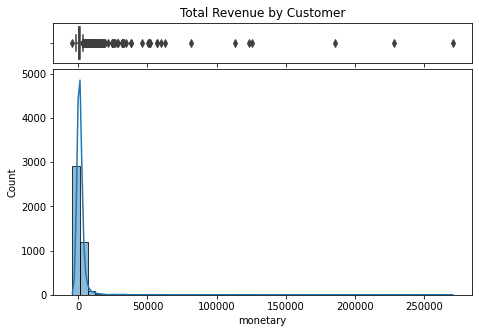

0.00     -4287.630
0.25       290.955
0.50       642.485
0.75      1563.750
1.00    270897.140
Name: monetary, dtype: float64

In [115]:
grid = {
    'height_ratios': (0.15, 0.85),
    'hspace': 0.05
}

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(7.5, 5), gridspec_kw=grid)

sns.boxplot(data=df_customer, x='monetary', ax=ax1)
sns.histplot(data=df_customer, x='monetary', kde=True, ax=ax2, bins=50)

ax1.set(
    title='Total Revenue by Customer'
)

plt.show()

display(df_customer['monetary'].quantile([0, 0.25, 0.5, 0.75, 1]))

Berdasarkan distribusi di atas, kita akan kelompokkan customer berdasarkan monetary-nya ke dalam 4 kelompok yaitu :
- 4 (Top Spender) : melakukan transaksi lebih dari 1563.75 dollar
- 3 (High Spender) : melakukan transaksi antara 642.48 hingga 1563.75 dollar
- 2 (Medium Spender) : melakukan transaksi antara 290.95 hingga 642.48 dollar
- 1 (Low Spender) : melakukan transaksi kurang dari dari 290.95 dollar

In [122]:
df_customer['m_score'] = pd.qcut(df_customer['monetary'], q=4, labels=[1, 2, 3, 4]).astype(int)
df_customer.sample(5, random_state=42)

,recency,customer_age,frequency,monetary,avg_spend_per_product,r_score,f_score,m_score
CustomerID,,,,,,,,
15110,25,320,7,970.25,24.256250,3,4,3
17655,12,286,6,1962.84,23.937073,4,4,4
18200,107,107,1,163.80,5.118750,2,1,1
12573,229,229,1,160.54,5.733571,1,1,1
15797,97,321,4,2207.40,275.925000,2,3,4


**RFM Segementation**

Selanjutnya kita akan menggabungan r_score, f_score, dan m_score menjadi rfm_score

In [125]:
df_customer['rfm_score'] = df_customer['r_score'] + df_customer['f_score'] + df_customer['m_score']
df_customer.sample(5, random_state=42)

,recency,customer_age,frequency,monetary,avg_spend_per_product,r_score,f_score,m_score,rfm_score
CustomerID,,,,,,,,,
15110,25,320,7,970.25,24.256250,3,4,3,10
17655,12,286,6,1962.84,23.937073,4,4,4,12
18200,107,107,1,163.80,5.118750,2,1,1,4
12573,229,229,1,160.54,5.733571,1,1,1,3
15797,97,321,4,2207.40,275.925000,2,3,4,9


Lalu kita akan kelompokkan kedalam 4 segmen dengan ketentuan berikut:

In [128]:
def rfm_segmentation(x):
    if x <= 5:
        return 'Bronze'
    elif x <= 7:
        return 'Silver'
    elif x <= 10:
        return 'Gold'
    else:
        return 'Platinum'
    
df_customer['rfm_level'] = df_customer['rfm_score'].apply(rfm_segmentation)
df_customer.sample(5, random_state=42)

,recency,customer_age,frequency,monetary,avg_spend_per_product,r_score,f_score,m_score,rfm_score,rfm_level
CustomerID,,,,,,,,,,
15110,25,320,7,970.25,24.256250,3,4,3,10,Gold
17655,12,286,6,1962.84,23.937073,4,4,4,12,Platinum
18200,107,107,1,163.80,5.118750,2,1,1,4,Bronze
12573,229,229,1,160.54,5.733571,1,1,1,3,Bronze
15797,97,321,4,2207.40,275.925000,2,3,4,9,Gold


Kita akan coba tampilkan dalam bentuk visualisasi sebagai berikut:

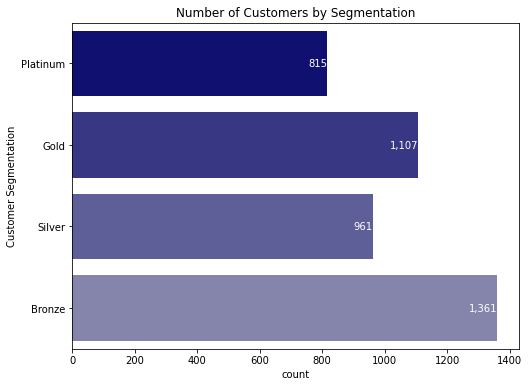

In [150]:
color_palette= sns.blend_palette(['navy', 'lightgrey'])

# membuat figura
fig, ax = plt.subplots(figsize=(8,6))

# membuat plot
ax = sns.countplot(
    data=df_customer, 
    y='rfm_level',
    order=['Platinum', 'Gold', 'Silver', 'Bronze'],
    palette=color_palette
)

# mengatur judul dan label
ax.set(
    title='Number of Customers by Segmentation',
    ylabel='Customer Segmentation'
)

# menambahkan label data
for bar in ax.patches:
    x, y = bar.get_xy()
    ax.text(
        x + bar.get_width(),
        y + bar.get_height()/2,
        f'{bar.get_width():,d}',
        color='white',
        ha='right',
        va='center'
    )

plt.show()

Ringkasan dalam bentuk tabel sebagai berikut:

In [154]:
rfm_segment = df_customer.groupby('rfm_level').agg(
    n_customer=('recency', 'count'),
    median_recency=('recency', 'median'),
    median_frequency=('frequency', 'median'),
    median_monetary=('monetary', 'median'),
).sort_values('median_monetary')
rfm_segment

,n_customer,median_recency,median_frequency,median_monetary
rfm_level,,,,
Bronze,1361,179.0,1.0,222.99
Silver,961,66.0,2.0,502.09
Gold,1107,32.0,4.0,1078.96
Platinum,815,13.0,10.0,3000.36


Dari visualisasi dan tabel di atas kita dapat membuat summary dan rekomendasi sebagai berikut:

| Segment | Deskripsi | Strategi |
| --- | --- | --- | 
|Platinum |Membeli dalam 1 bulan terakhir dengan nilai transaksi dan frekuensi yang sangat tinggi (~10). |Fokus untuk meningkatkan pembelian customer sehingga perlu membentuk cross/Up Selling Strategy dan rekomendasi personal|
|Gold | Membeli dalam 1 bulan terakhir dengan nilai transaksi yang cukup tinggi namun frekuensi sedang (~4). |Fokus supaya customer melakukan pembelian kembali sehingga perlu membentuk Retention Strategy, Cross/Up Selling Strategy. |
|Silver |Membeli dalam 2 bulan terakhir dengan nilai transaksi yang sedang namun frekuensi rendah (~2). |Customer pada segmen ini sangat beresiko untuk churn, maka fokus untuk mengaktifkan customer dan melakukan pembelian kembali dengan membentuk Reactivation Strategy, Retention Strategy. |
|Bronze |Membeli lebih dari 6 bulan terakhir dengan nilai transaksi yang kecil dan frekuensi sekitar 1 kali. |Customer pada segmen ini kemungkinan sudah churn, maka fokus campaign untuk mengaktifkan customer kembali dengan membentuk Reactivation strategy. |


In [ ]:
pip install plotly

In [155]:
import plotly.express as px

color_map = {'Bronze' : 'blue', 'Silver' : 'green', 'Gold' : 'orange', 'Platinum' : 'red'}

fig = px.scatter_3d(
    df_customer, 
    x='recency', 
    y='frequency', 
    z='monetary',
    color='rfm_level', 
    color_discrete_map=color_map, 
)
                          
fig.update_traces(marker_size = 3)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  title={
                    'text': "RFM segmentation",
                    'y':0.97,
                    'x':0.45,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                   legend=dict(
                      yanchor="top",
                      y=0.97,
                      xanchor="left",
                      x=0.70,
                      itemsizing='constant',
                      itemwidth = 30))

fig.update_xaxes(tickformat=".0f")